**Capstone 2: Pre-Processing**

Problem Statement: The National Transportation Safety Board (NTSB) has an Aviation Accident Database that contains information about civil aviation accidents and incidents that they investigate within the United States, its territories and international waters. For this Project, we will specifically be looking at airplane accidents for the 20 years from 2002 to 2021. The operations included are scheduled Part 121: Air Carrier, which includes most passenger airlines, as well as Part 135: Small Carrier for both commuter and ‘air taxi’ small aircraft. This dataset does not include aircraft accidents where the aircraft involved was amateur built.

**Notebook Objectives:**


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel('data/flights_EDA.xlsx')
df.head()

,NtsbNo,EventType,Mkey,EventDate,City,State,Country,N#,HasSafetyRec,Mode,...,FAR Part,Findings_supp,Findings_main1,Findings_main2,Findings_main3,Findings_main4,Findings_main5,Findings_main6,Region,EventMonth
0,ANC08MA038,ACC,67341,2008-01-05T13:43:00Z,Kodiak,Alaska,United States,N509FN,False,Aviation,...,135,Personnel issues - Task performance - Mainten...,Aircraft,Aircraft structures,Doors,Cargo/baggage doors,Incorrect service/maintenance,NaN,Pacific,1
1,ANC08LA031,ACC,67395,2008-01-15T14:39:00Z,Bethel,Alaska,United States,N454SF,False,Aviation,...,135,Personnel issues - Action/decision - Info pro...,Environmental issues,Physical environment,Runway/land/takeoff/taxi surface,Snow/slush/ice covered surface,Not specified,NaN,Pacific,1
2,ANC08LA046,ACC,67751,2008-04-01T14:40:00Z,Koliganek,Alaska,United States,N8327S,False,Aviation,...,135,Environmental issues - Physical environment -...,Environmental issues,Conditions/weather/phenomena,Light condition,Flat light,Effect on personnel,NaN,Pacific,4
3,ANC08FA050,ACC,67801,2008-04-09T15:30:00Z,Unalaska,Alaska,United States,N741,False,Aviation,...,135,Personnel issues - Action/decision - Info pro...,Environmental issues,Physical environment,Object/animal/substance,Ground vehicle,Contributed to outcome,NaN,Pacific,4
4,ANC08CA065,ACC,68340,2008-04-28T13:30:00Z,Talkeetna,Alaska,United States,N565TA,False,Aviation,...,135,Personnel issues - Action/decision - Info pro...,Environmental issues,Physical environment,Runway/land/takeoff/taxi surface,Snow/slush/ice covered surface,Not specified,NaN,Pacific,4


In [3]:
df.columns

Index(['NtsbNo', 'EventType', 'Mkey', 'EventDate', 'City', 'State', 'Country',
       'N#', 'HasSafetyRec', 'Mode', 'OriginalPublishedDate',
       'HighestInjuryLevel', 'FatalInjuryCount', 'SeriousInjuryCount',
       'MinorInjuryCount', 'ProbableCause', 'FAR Part', 'Findings_supp',
       'Findings_main1', 'Findings_main2', 'Findings_main3', 'Findings_main4',
       'Findings_main5', 'Findings_main6', 'Region', 'EventMonth'],
      dtype='object')

I'm going to delete some columns since I'm about to make a lot of new ones with one-hot encoding the categorical data. I've narrowed down what I'm looking at overall: where the accident occured (region), the main cause, the month and the injury counts. Will also keep FAR part to see if a specific category of aircraft makes a difference.

Columns to be deleted: EventType (all ACC), Mode (all aviation), originalPublishedDate (date the report was published), ProbableCause (covered by main cause), Findings_supp, and all Findings_main except main1.

In [4]:
df = df.drop(['EventType', 'Mode', 'OriginalPublishedDate', 'ProbableCause', 'Findings_supp'], axis = 1)
df = df.drop(['Findings_main2', 'Findings_main3', 'Findings_main4', 'Findings_main5', 'Findings_main6'], axis = 1)
df.rename(columns = {'Findings_main1':'Failure_Category'}, inplace = True)
df = df.sort_values('EventDate', ignore_index = True)

In [5]:
df.head()

,NtsbNo,Mkey,EventDate,City,State,Country,N#,HasSafetyRec,HighestInjuryLevel,FatalInjuryCount,SeriousInjuryCount,MinorInjuryCount,FAR Part,Failure_Category,Region,EventMonth
0,ANC08MA038,67341,2008-01-05T13:43:00Z,Kodiak,Alaska,United States,N509FN,False,Fatal,6.0,3.0,1.0,135,Aircraft,Pacific,1
1,CHI08LA071,67425,2008-01-09T07:49:00Z,Detroit,Michigan,United States,N349NB,False,None,0.0,0.0,0.0,121,Personnel issues,EastNorthCentral,1
2,SEA08LA061,67369,2008-01-13T19:29:00Z,San Francisco,California,United States,"N705SK, N508UA",False,None,0.0,0.0,0.0,121,Environmental issues,Pacific,1
3,SEA08FA062,67390,2008-01-14T05:08:00Z,Lihue,Hawaii,United States,N410UB,False,Fatal,1.0,0.0,0.0,135,Personnel issues,Pacific,1
4,ANC08LA031,67395,2008-01-15T14:39:00Z,Bethel,Alaska,United States,N454SF,False,Minor,0.0,0.0,1.0,135,Environmental issues,Pacific,1


**Creating Dummy Variables**

In [6]:
df = pd.get_dummies(df, columns = ['Region', 'FAR Part', 'HighestInjuryLevel'])
df.head()

,NtsbNo,Mkey,EventDate,City,State,Country,N#,HasSafetyRec,FatalInjuryCount,SeriousInjuryCount,...,Region_PacificOcean,Region_SouthAtlantic,Region_WestNorthCentral,Region_WestSouthCentral,FAR Part_121,FAR Part_135,HighestInjuryLevel_Fatal,HighestInjuryLevel_Minor,HighestInjuryLevel_None,HighestInjuryLevel_Serious
0,ANC08MA038,67341,2008-01-05T13:43:00Z,Kodiak,Alaska,United States,N509FN,False,6.0,3.0,...,0,0,0,0,0,1,1,0,0,0
1,CHI08LA071,67425,2008-01-09T07:49:00Z,Detroit,Michigan,United States,N349NB,False,0.0,0.0,...,0,0,0,0,1,0,0,0,1,0
2,SEA08LA061,67369,2008-01-13T19:29:00Z,San Francisco,California,United States,"N705SK, N508UA",False,0.0,0.0,...,0,0,0,0,1,0,0,0,1,0
3,SEA08FA062,67390,2008-01-14T05:08:00Z,Lihue,Hawaii,United States,N410UB,False,1.0,0.0,...,0,0,0,0,0,1,1,0,0,0
4,ANC08LA031,67395,2008-01-15T14:39:00Z,Bethel,Alaska,United States,N454SF,False,0.0,0.0,...,0,0,0,0,0,1,0,1,0,0


**Dropping Columns**

There are a few columns that are objects that we do not need for this model that need to be dropped so that the model will run properly.

In [7]:
df.dtypes

NtsbNo                         object
Mkey                            int64
EventDate                      object
City                           object
State                          object
Country                        object
N#                             object
HasSafetyRec                     bool
FatalInjuryCount              float64
SeriousInjuryCount            float64
MinorInjuryCount              float64
Failure_Category               object
EventMonth                      int64
Region_Caribbean                uint8
Region_EastNorthCentral         uint8
Region_EastSouthCentral         uint8
Region_MiddleAtlantic           uint8
Region_Mountain                 uint8
Region_NewEngland               uint8
Region_Other                    uint8
Region_Pacific                  uint8
Region_PacificOcean             uint8
Region_SouthAtlantic            uint8
Region_WestNorthCentral         uint8
Region_WestSouthCentral         uint8
FAR Part_121                    uint8
FAR Part_135

In [8]:
df = df.drop(['NtsbNo', 'EventDate', 'City', 'State', 'Country', 'N#', 'Mkey'], axis = 1)
df.head()

,HasSafetyRec,FatalInjuryCount,SeriousInjuryCount,MinorInjuryCount,Failure_Category,EventMonth,Region_Caribbean,Region_EastNorthCentral,Region_EastSouthCentral,Region_MiddleAtlantic,...,Region_PacificOcean,Region_SouthAtlantic,Region_WestNorthCentral,Region_WestSouthCentral,FAR Part_121,FAR Part_135,HighestInjuryLevel_Fatal,HighestInjuryLevel_Minor,HighestInjuryLevel_None,HighestInjuryLevel_Serious
0,False,6.0,3.0,1.0,Aircraft,1,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
1,False,0.0,0.0,0.0,Personnel issues,1,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
2,False,0.0,0.0,0.0,Environmental issues,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,False,1.0,0.0,0.0,Personnel issues,1,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
4,False,0.0,0.0,1.0,Environmental issues,1,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0


In [9]:
#one more check for any missing values
df.isna().sum()

HasSafetyRec                  0
FatalInjuryCount              1
SeriousInjuryCount            1
MinorInjuryCount              1
Failure_Category              0
EventMonth                    0
Region_Caribbean              0
Region_EastNorthCentral       0
Region_EastSouthCentral       0
Region_MiddleAtlantic         0
Region_Mountain               0
Region_NewEngland             0
Region_Other                  0
Region_Pacific                0
Region_PacificOcean           0
Region_SouthAtlantic          0
Region_WestNorthCentral       0
Region_WestSouthCentral       0
FAR Part_121                  0
FAR Part_135                  0
HighestInjuryLevel_Fatal      0
HighestInjuryLevel_Minor      0
HighestInjuryLevel_None       0
HighestInjuryLevel_Serious    0
dtype: int64

In [10]:
df[df['FatalInjuryCount'].isna() == True]

,HasSafetyRec,FatalInjuryCount,SeriousInjuryCount,MinorInjuryCount,Failure_Category,EventMonth,Region_Caribbean,Region_EastNorthCentral,Region_EastSouthCentral,Region_MiddleAtlantic,...,Region_PacificOcean,Region_SouthAtlantic,Region_WestNorthCentral,Region_WestSouthCentral,FAR Part_121,FAR Part_135,HighestInjuryLevel_Fatal,HighestInjuryLevel_Minor,HighestInjuryLevel_None,HighestInjuryLevel_Serious
651,False,NaN,NaN,NaN,Environmental issues,5,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0


In [11]:
#Looks likw all the missing values are in one line, so going to delete that line
df = df.drop(labels = [651], axis = 0)
df.isna().sum()

HasSafetyRec                  0
FatalInjuryCount              0
SeriousInjuryCount            0
MinorInjuryCount              0
Failure_Category              0
EventMonth                    0
Region_Caribbean              0
Region_EastNorthCentral       0
Region_EastSouthCentral       0
Region_MiddleAtlantic         0
Region_Mountain               0
Region_NewEngland             0
Region_Other                  0
Region_Pacific                0
Region_PacificOcean           0
Region_SouthAtlantic          0
Region_WestNorthCentral       0
Region_WestSouthCentral       0
FAR Part_121                  0
FAR Part_135                  0
HighestInjuryLevel_Fatal      0
HighestInjuryLevel_Minor      0
HighestInjuryLevel_None       0
HighestInjuryLevel_Serious    0
dtype: int64

**Looking at Correlations**

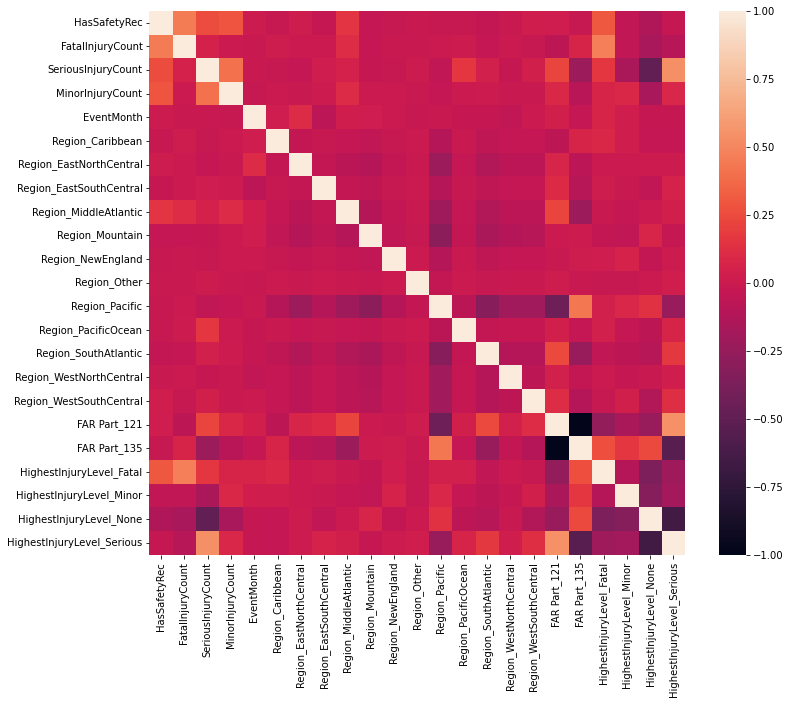

In [12]:
plt.subplots(figsize=(12,10))
sns.heatmap(df.corr());

**Split into Train/Test Datasets**

In [13]:
#The five Accident categories are going to be our dependent variable
X = df.drop(['Failure_Category'], axis = 1)
X_names= X.columns.values.tolist()
y = df[['Failure_Category']]
y_names = y.columns.values.tolist()

In [14]:
from sklearn.model_selection import train_test_split
X_train_a, X_test_a, y_train_a, y_test_a = train_test_split(X.values, y.values, test_size = 0.3, random_state = 42)

**Scaling the Injury Count Columns**

The three injury count columns are the only number columns that are not on a scale, going to fix that by creating a scaler and fitting and transforming the y_train data with it, then just transforming the test data.

In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_a[:,[2,3,4]] = scaler.fit_transform(X_train_a[:,[2,3,4]])
X_test_a[:,[2,3,4]] = scaler.transform(X_test_a[:,[2,3,4]])

In [16]:
#Changing the column names stored in X_names to show that the injury count columns are scaled values
X_names[2:5] = 'Scaled_FatalInjuryCount', 'Scaled_SeriousInjuryCount', 'Scaled_MinorInjuryCount'

**Final Step**

Changing the arrays back to DataFrames with column names for processing.

In [17]:
X_train = pd.DataFrame(X_train_a, columns = X_names)
X_test = pd.DataFrame(X_test_a, columns = X_names)
y_train = pd.DataFrame(y_train_a, columns = y_names)
y_test = pd.DataFrame(y_test_a, columns = y_names)

Now need to store in csv file for use in the next notebook, which will be for the modeling step

In [18]:
X_train.to_excel('data/X_train.xlsx', index = False)
X_test.to_excel('data/X_test.xlsx', index = False)
y_train.to_excel('data/y_train.xlsx', index = False)
y_test.to_excel('data/y_test.xlsx', index = False)